In [1]:
!pip install -U git+https://github.com/dunderlab/python-dunderlab.visualizations.git

  Cloning https://github.com/dunderlab/python-dunderlab.visualizations.git to /tmp/pip-req-build-kjad99fm
  Running command git clone --filter=blob:none --quiet https://github.com/dunderlab/python-dunderlab.visualizations.git /tmp/pip-req-build-kjad99fm
  Resolved https://github.com/dunderlab/python-dunderlab.visualizations.git to commit 4ef5ecef9ea456917e161b86b787909e769d2e0b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 53.6 MB/s eta 0:00:00:00:01
  Created wheel for dunderlab-visualizations: filename=dunderlab_visualizations-0.7-py3-none-any.whl size=24140 sha256=805d87cd0fdde9dbcac843e796beb721db20b230cbf483f15139d4c212a40700
  Stored in directory: /tmp/pip-ephem-wheel-cache-tf5yz550/wheels/1d/91/2e/4e5463fc6e8b03c07fc1784b2c6830b59b936fac96c9f3d20c
Successfully built dunderlab-visualizations


In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from dunderlab.visualizations.connectivities import CircosConnectivity, interact_connectivity

In [8]:
channels=['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4',
                     'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6',
                     'CP3', 'CP1', 'CPz', 'CP2', 'CP4',
                     'P1', 'Pz', 'P2', 'POz']

In [11]:
areas = {
    'Frontal': ['Fz','FCz','Cz'], 
    
    'Frontal R': ['FC2', 'FC4'],
    'Central R': ['C2', 'C4', 'C6'],
    'Centro Parietal R': ['CP2', 'CP4'],
    'Parietal R': ['P2'],
    
    'Posterior': ['CPz', 'Pz','POz'],
    
    'Parietal L': ['P1'],
    'Centro Parietal L': ['CP3', 'CP1'],
    'Central L': ['C5', 'C3', 'C1'],
    'Frontal L': ['FC3', 'FC1'],
}

In [4]:
datos_clase0 = []
datos_clase1 = []

for clase in [0, 1]:
    for subj in range(1, 11):
        ruta = f'/kaggle/input/te-random-model1/TE_Ramdon1_clase{clase}_{subj}.npy'
        try:
            data = np.load(ruta)
            if clase == 0:
                datos_clase0.append(data)
            else:
                datos_clase1.append(data)
        except FileNotFoundError:
            print(f'Archivo no encontrado: {ruta}')
            
matriz_clase0 = np.stack(datos_clase0, axis=0)
matriz_clase1 = np.stack(datos_clase1, axis=0)

print("Matriz clase 0:", matriz_clase0.shape)
print("Matriz clase 1:", matriz_clase1.shape)

Matriz clase 0: (10, 22, 22)
Matriz clase 1: (10, 22, 22)


In [5]:
matriz_clase0

array([[[ 0.        ,  1.1205773 ,  1.4294198 , ...,  2.32695   ,
          1.1351037 ,  1.4979873 ],
        [ 4.669542  ,  0.        ,  2.036968  , ...,  0.9523468 ,
          0.92797935,  0.44080043],
        [ 2.6802733 ,  0.2988261 ,  0.        , ...,  1.1298538 ,
          1.106456  ,  0.13910928],
        ...,
        [ 0.3735335 ,  0.08030671,  0.46426445, ...,  0.        ,
          0.09416236,  0.3453067 ],
        [ 1.7679262 ,  1.9107661 ,  0.93387115, ...,  0.08436432,
          0.        ,  4.4990726 ],
        [ 0.4316006 ,  5.6232104 ,  1.0362071 , ...,  0.82556593,
          1.9959242 ,  0.        ]],

       [[ 0.        ,  2.4582264 ,  1.7209303 , ...,  3.6812732 ,
          0.16410658,  0.3574685 ],
        [ 2.4079282 ,  0.        ,  1.0439048 , ...,  0.48713154,
          0.63707364,  0.37099496],
        [ 1.1035124 ,  0.34142792,  0.        , ...,  1.0479347 ,
          0.45800745,  2.0243309 ],
        ...,
        [ 0.65066767,  3.0547416 ,  0.41386738, ...,  

In [9]:
matriz_clase0
promedio_class0 = np.mean(matriz_clase0, axis=0)

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0), IntSlider(value=-1, descriptio…

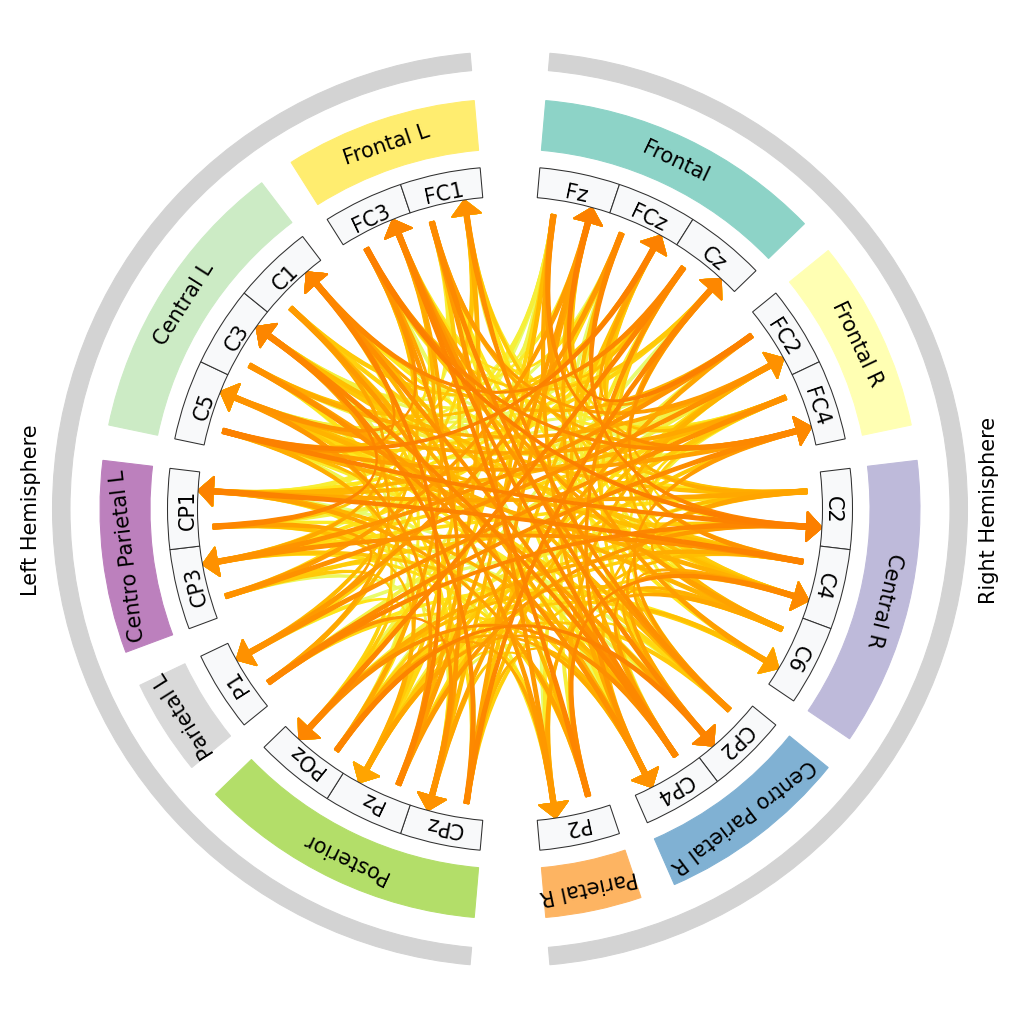

In [12]:
conn_dir  = interact_connectivity(promedio_class0 , channels, areas)

In [13]:
arguments  = conn_dir().params
arguments

{'threshold': 0.0,
 'limit_connections': -1,
 'percentile': [25, 75],
 'normalize_colors': True,
 'areas_cmap': 'Set3',
 'arcs_cmap': 'Wistia',
 'hemisphere_color': 'lightgray',
 'channel_color': '#f8f9fa',
 'width': {'hemispheres': 35, 'areas': 100, 'channels': 60},
 'text': {'hemispheres': 40, 'areas': 20, 'channels': 40},
 'separation': {'hemispheres': 10, 'areas': -30, 'channels': 5},
 'labelposition': {'hemispheres': 60, 'areas': 0, 'channels': -10},
 'size': 10,
 'labelsize': 15,
 'show_emisphere': True,
 'connection_width': 0.09999999999999999,
 'small_separation': 5,
 'big_separation': 10,
 'offset': 0,
 'arcs_separation_src': 30,
 'arcs_separation_dst': 30,
 'arrowhead_width': 0.05,
 'arrowhead_length': 30,
 'arrow_max_width': 10}

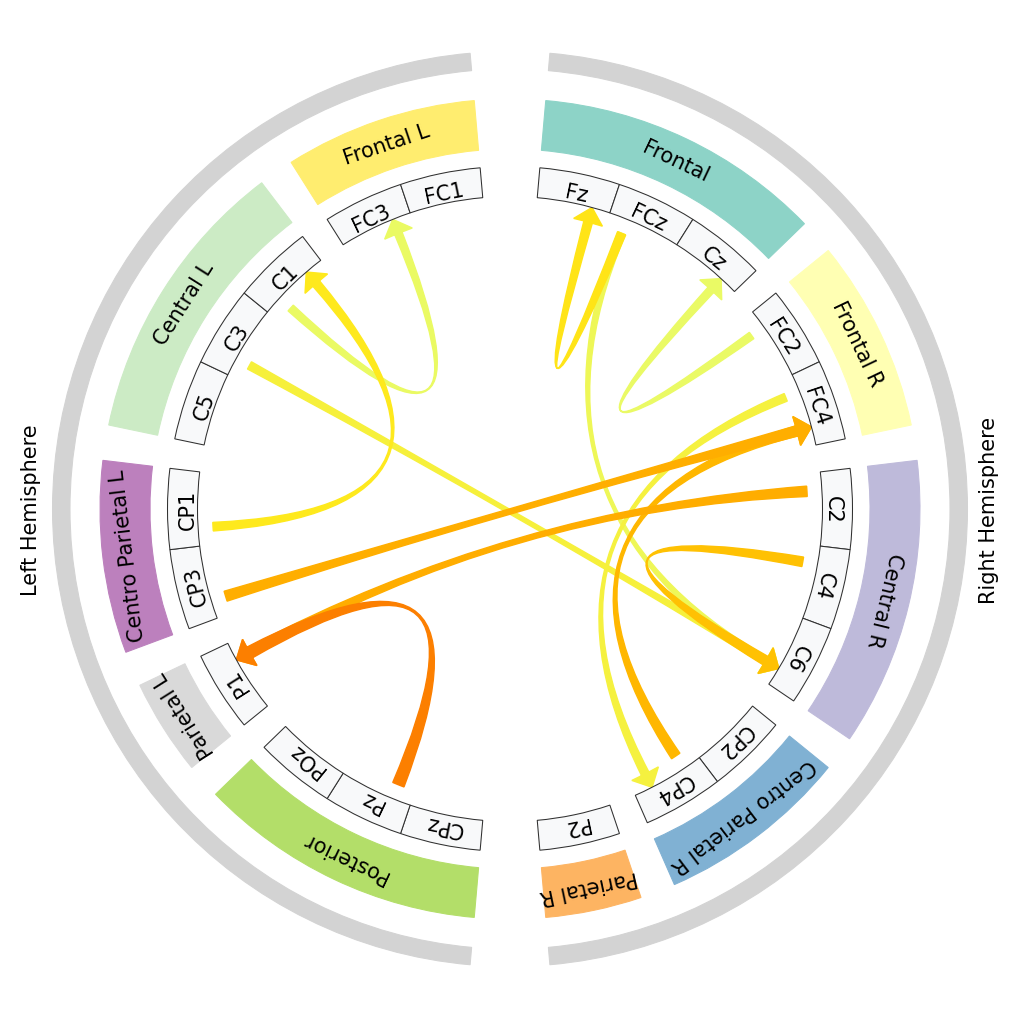

In [15]:
arguments_ = arguments.copy()
arguments_.update({
    'threshold': 0.3,
    'percentile': [95, 100],
})
CircosConnectivity(promedio_class0, channels, areas, **arguments_)

# Clase 1

In [18]:
matriz_clase1
promedio_class1 = np.mean(matriz_clase1, axis=0)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


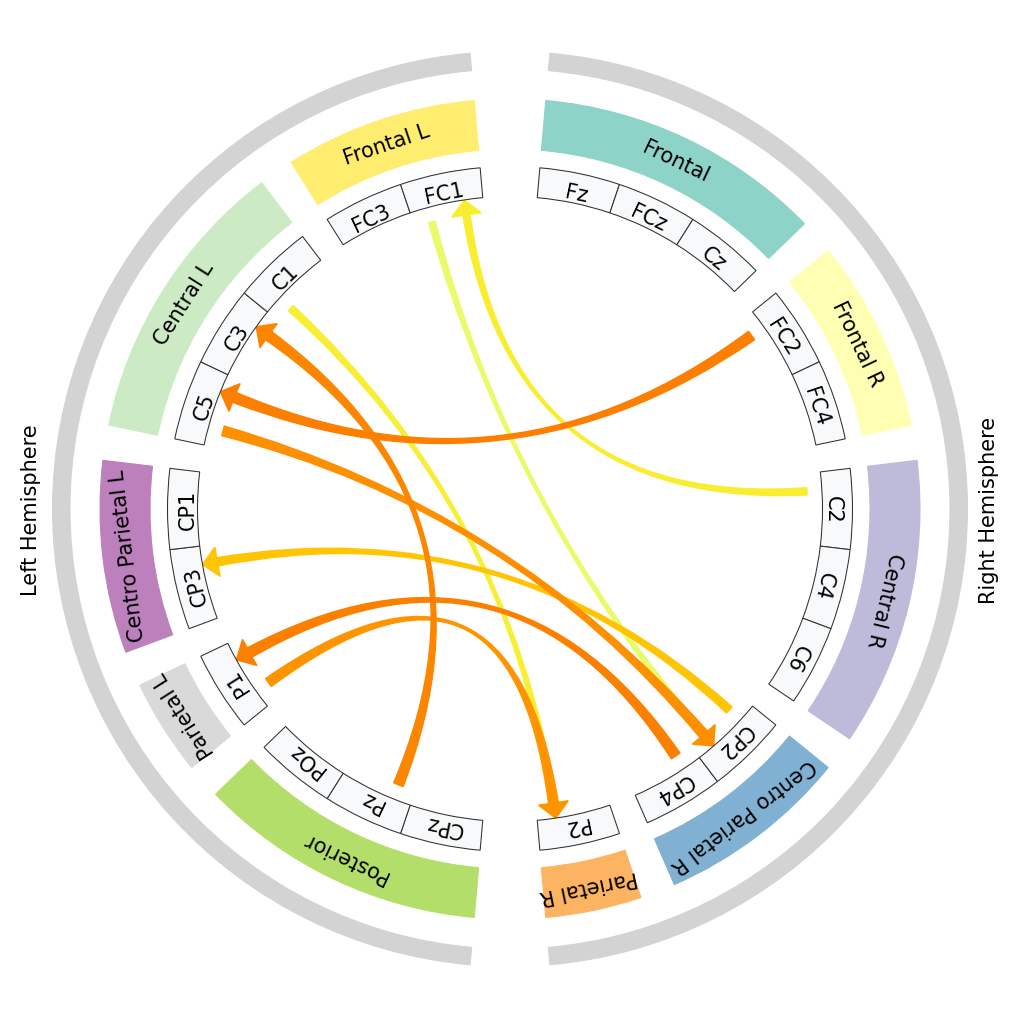

In [21]:
arguments_ = arguments.copy()
arguments_.update({
    'threshold':0.4,
    'percentile': [95, 100],
})
CircosConnectivity(promedio_class1, channels, areas, **arguments_)